# Tagging and Visualizing Community Interests, Measuring Influence inside community, and impact of community in the whole network

## Plan
1. Данные для анализа (выбрать сообщества для анализа (И))
2. Introduction for paper (Обзор того, как делается теггирование (1,5 стр) + по 0,5 на каждый алгоритм кластеризации), См. Расстояние Уорда, косинус (Ward distance), сокращение размерности.
3. Подсчитать наиболее значимые слова в полученном кластере Disp(TF/IDF), top 10
4. Проверить аддитивность, транзитивность, гомогенность сообществ
Profit

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
import glob
import os
import matplotlib.pyplot as plt
import time
import artm

print artm.version()

0.8.3


In [7]:
a1= []
a2 =[]
a3 =[]
a4 =[]
a5 =[]

for i in range(1):
    batch_vectorizer = None
    if len(glob.glob(os.path.join('vk', '*.batch'))) < 1:
        batch_vectorizer = artm.BatchVectorizer(data_path='vw.vk.txt', data_format='vowpal_wabbit', target_folder='vk')
    else:
        batch_vectorizer = artm.BatchVectorizer(data_path='vk', data_format='batches')
    dictionary = artm.Dictionary()
    model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in xrange(50)],
                           scores=[artm.PerplexityScore(name='PerplexityScore', dictionary=dictionary)],
                           regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-1.6)],
                           cache_theta=True)
    if not os.path.isfile('vk/dictionary.dict'):
        dictionary.gather(data_path=batch_vectorizer.data_path)
        dictionary.save(dictionary_path='vk/dictionary.dict')
    dictionary.load(dictionary_path='vk/dictionary.dict')
    model_artm.initialize(dictionary=dictionary)
    model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
    model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
    model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1))
    
    model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.2))
    model_artm.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=2.5e+5))
    
    model_artm.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10))
    model_artm.num_document_passes = 1
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)
    a1.append(model_artm.score_tracker['SparsityPhiScore'].last_value)
    a2.append(model_artm.score_tracker['SparsityThetaScore'].last_value)
    a3.append(model_artm.score_tracker['TopicKernelScore'].last_average_contrast)
    a4.append(model_artm.score_tracker['TopicKernelScore'].last_average_purity)
    a5.append(model_artm.score_tracker['PerplexityScore'].last_value)

In [5]:
print(model_artm.score_tracker['SparsityThetaScore'].last_value)
print(model_artm.score_tracker['TopicKernelScore'].last_average_contrast)
print(model_artm.score_tracker['TopicKernelScore'].last_average_purity)
print(model_artm.score_tracker['PerplexityScore'].last_value)

0.661718439084
0.36649645995
0.00497119698324
117195.205017


In [8]:
print(model_artm.score_tracker['SparsityThetaScore'].last_value)
print(model_artm.score_tracker['TopicKernelScore'].last_average_contrast)
print(model_artm.score_tracker['TopicKernelScore'].last_average_purity)
print(model_artm.score_tracker['PerplexityScore'].last_value)

0.661715608322
0.366545269102
0.00497362809348
117099.28948


In [37]:
batch_vectorizer = None
if len(glob.glob(os.path.join('vk', '*.batch'))) < 1:
    batch_vectorizer = artm.BatchVectorizer(data_path='vw.vk.txt', data_format='vowpal_wabbit', target_folder='vk')
else:
    batch_vectorizer = artm.BatchVectorizer(data_path='vk', data_format='batches')

In [38]:
dictionary = artm.Dictionary()

model_plsa = artm.ARTM(topic_names=['topic_{}'.format(i) for i in xrange(50)],
                       scores=[artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary)],
                       cache_theta=True)

model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in xrange(50)],
                       scores=[artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary)],
                       regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-1.85)],
                       cache_theta=True)

In [39]:
if not os.path.isfile('vk/dictionary.dict'):
    dictionary.gather(data_path=batch_vectorizer.data_path)
    dictionary.save(dictionary_path='vk/dictionary.dict')

dictionary.load(dictionary_path='vk/dictionary.dict')
dictionary.load(dictionary_path='vk/dictionary.dict')

In [40]:
model_plsa.initialize(dictionary=dictionary)
model_artm.initialize(dictionary=dictionary)

In [28]:
model_plsa.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_plsa.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_plsa.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1))

model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1))

In [29]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.2))
model_artm.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=2.5e+5))

In [30]:
model_plsa.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10))
model_artm.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10))

In [31]:
model_plsa.num_document_passes = 1
model_artm.num_document_passes = 1

model_plsa.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)

In [32]:
model_plsa.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=4)
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=4)

In [33]:
model_plsa.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)

In [42]:
def print_measures(model_plsa, model_artm):
    print 'Sparsity Phi: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
        model_plsa.score_tracker['SparsityPhiScore'].last_value,
        model_artm.score_tracker['SparsityPhiScore'].last_value)

    print 'Sparsity Theta: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
        model_plsa.score_tracker['SparsityThetaScore'].last_value,
        model_artm.score_tracker['SparsityThetaScore'].last_value)

    print 'Kernel contrast: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
        model_plsa.score_tracker['TopicKernelScore'].last_average_contrast,
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast)

    print 'Kernel purity: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
        model_plsa.score_tracker['TopicKernelScore'].last_average_purity,
        model_artm.score_tracker['TopicKernelScore'].last_average_purity)

    print 'Perplexity: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
        model_plsa.score_tracker['PerplexityScore'].last_value,
        model_artm.score_tracker['PerplexityScore'].last_value)

    plt.plot(xrange(model_plsa.num_phi_updates), model_plsa.score_tracker['PerplexityScore'].value, 'b--',
             xrange(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel('PLSA perp. (blue), ARTM perp. (red)')
    plt.grid(True)
    plt.show()

In [46]:
def print_measures(model_artm):
    print 'Sparsity Phi: {1:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)

    print 'Sparsity Theta: {1:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value)

    print 'Kernel contrast: {1:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast)

    print 'Kernel purity: {1:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity)

    print 'Perplexity: {1:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)

In [35]:
topic_words= []

for topic_name in model_artm.topic_names:
    topic_words.append(model_artm.score_tracker['TopTokensScore'].last_tokens[topic_name])

In [36]:
for j in range(70):
    print('topic %d:' % j)
    for i in topic_words[j]:
        print i
    print('\n')

topic 0:
млрд_NOUN
год_NOUN
рубль_NOUN
миллиард_NOUN
составлять_VERB
доллар_NOUN
компания_NOUN
руб_NOUN
состояние_NOUN
акционер_NOUN


topic 1:
этот_ADJ
они_NOUN
который_ADJ
это_NOUN
свой_ADJ
весь_ADJ
она_NOUN
такой_ADJ
либеральный_ADJ
его_ADJ


topic 2:
музыка_NOUN
язык_NOUN
сергей_NOUN
концерт_NOUN
курехин_NOUN
смотреть_INFN
алгебра_NOUN
музыкант_NOUN
композитор_NOUN
кино_NOUN


topic 3:
турция_NOUN
отец_NOUN
год_NOUN
сын_NOUN
карта_NOUN
большой_ADJ
дом_NOUN
она_NOUN
помогать_INFN
фото_NOUN


topic 4:
форум_NOUN
новый_ADJ
литература_NOUN
мочь_VERB
язык_NOUN
информация_NOUN
технология_NOUN
развитие_NOUN
британский_ADJ
российский_ADJ


topic 5:
гость_NOUN
вечеринка_NOUN
сечин_NOUN
прием_NOUN
отель_NOUN
вечер_NOUN
стол_NOUN
праздник_NOUN
вино_NOUN
дерипаска_NOUN


topic 6:
борис_NOUN
мочь_VERB
дурицкая_NOUN
человек_NOUN
немцов_NOUN
работать_VERB
который_ADJ
жизнь_NOUN
киев_NOUN
она_NOUN


topic 7:
год_NOUN
дод_NOUN
директор_NOUN
русгидро_NOUN
богатый_ADJ
евгений_NOUN
председатель_NOUN
с

### Ну и как то так я пробовал подобрать наилучшее значение метрики, только сравнивал разные

In [180]:
a1 = []
a2 = []
a3 = []
b = []
k = -0.1
for i in range(1):
    k = k - 0.1
    batch_vectorizer = None
    if len(glob.glob(os.path.join('vk', '*.batch'))) < 1:
        batch_vectorizer = artm.BatchVectorizer(data_path='', data_format='bow_uci', collection_name='vk', target_folder='vk')
    else:
        batch_vectorizer = artm.BatchVectorizer(data_path='vk', data_format='batches')

    dictionary = artm.Dictionary()

    model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in xrange(50)], #
                           scores=[artm.PerplexityScore(name='PerplexityScore',
                                                        dictionary=dictionary)],
                           regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-1.85)], #1
                           cache_theta=True)

    if not os.path.isfile('vk/dictionary.dict'):
        dictionary.gather(data_path=batch_vectorizer.data_path)
        dictionary.save(dictionary_path='vk/dictionary.dict')

    dictionary.load(dictionary_path='vk/dictionary.dict')

    model_artm.initialize(dictionary=dictionary)

    model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
    model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
    model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) #3

    model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.2))
    model_artm.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=2.5e+5))
  
    model_artm.num_document_passes = 1 #4

    model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=25) #5

    a1.append(model_artm.score_tracker['TopicKernelScore'].last_average_contrast)
    a2.append(model_artm.score_tracker['TopicKernelScore'].last_average_purity)
    a3.append(model_artm.score_tracker['PerplexityScore'].last_value)
    b.append(k)

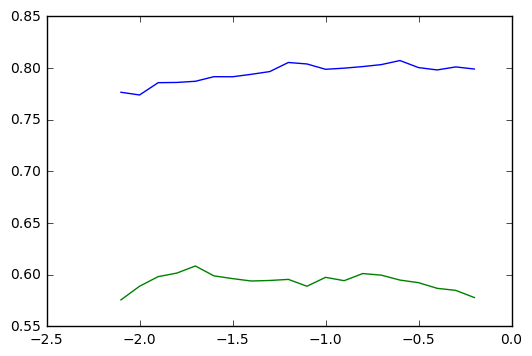

In [169]:
plt.plot(b,a2)
plt.plot(b,a1)

In [25]:
theta_matrix = model_artm.get_theta()
print theta_matrix

              6001      6002      6003  6004      6005      6006      6007  \
topic_0   0.000000  0.003775  0.003775   0.0  0.000000  0.003775  0.003770   
topic_1   0.000000  0.000094  0.000094   0.0  0.000000  0.000094  0.000093   
topic_2   0.000000  0.000000  0.000000   0.0  0.000000  0.000000  0.000000   
topic_3   0.000000  0.205269  0.205269   0.0  0.000000  0.205269  0.204997   
topic_4   0.000000  0.000000  0.000000   0.0  0.029555  0.000000  0.000000   
topic_5   0.000000  0.000000  0.000000   0.0  0.003082  0.000000  0.000000   
topic_6   0.000000  0.009181  0.009181   0.0  0.005251  0.009181  0.009169   
topic_7   0.000000  0.000000  0.000000   0.0  0.000000  0.000000  0.000000   
topic_8   0.000000  0.008044  0.008044   0.0  0.002699  0.008044  0.008034   
topic_9   0.000000  0.000000  0.000000   0.0  0.000000  0.000000  0.000000   
topic_10  0.000000  0.000000  0.000000   0.0  0.001659  0.000000  0.000000   
topic_11  0.000000  0.001246  0.001246   0.0  0.001221  0.001246

In [19]:
theta_matrix = model_artm.get_theta()
print theta_matrix

name: "nwt"
type: "class artm::core::DensePhiMatrix"
num_topics: 70
num_tokens: 44248
byte_size: 16335816

name: "pwt"
type: "class artm::core::AttachedPhiMatrix"
num_topics: 70
num_tokens: 44248
byte_size: 0

